In [1]:
import folium

%matplotlib inline

C:\Program Files\Anaconda-3.4.1.1\lib\site-packages\PIL\Image.py:84: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
C:\Program Files\Anaconda-3.4.1.1\lib\site-packages\PIL\Image.py:84: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [2]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [3]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>').add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>').add_to(m)

m

In [4]:
map_5 = folium.Map(location=[45.5236, -122.6750],
                   zoom_start=13)

folium.RegularPolygonMarker(
    [45.5012, -122.6655],
    popup='Ross Island Bridge',
    fill_color='#132b5e',
    number_of_sides=3,
    radius=10
    ).add_to(map_5)
folium.RegularPolygonMarker(
    [45.5132, -122.6708],
    popup='Hawthorne Bridge',
    fill_color='#45647d',
    number_of_sides=4,
    radius=10
    ).add_to(map_5)
folium.RegularPolygonMarker(
    [45.5275, -122.6692],
    popup='Steel Bridge',
    fill_color='#769d96',
    number_of_sides=6,
    radius=10
    ).add_to(map_5)
folium.RegularPolygonMarker(
    [45.5318, -122.6745],
    popup='Broadway Bridge',
    fill_color='#769d96',
    number_of_sides=8,
    radius=10
    ).add_to(map_5)
map_5

In [5]:
import osmnx as ox, networkx as nx

In [6]:
import warnings
import requests
import contextlib

try:
    from functools import partialmethod
except ImportError:
    # Python 2 fallback: https://gist.github.com/carymrobbins/8940382
    from functools import partial

    class partialmethod(partial):
        def __get__(self, instance, owner):
            if instance is None:
                return self

            return partial(self.func, instance, *(self.args or ()), **(self.keywords or {}))

@contextlib.contextmanager
def no_ssl_verification():
    old_request = requests.Session.request
    requests.Session.request = partialmethod(old_request, verify=False)

    warnings.filterwarnings('ignore', 'Unverified HTTPS request')
    yield
    warnings.resetwarnings()

    requests.Session.request = old_request

In [7]:
# download the street network for Piedmont, CA
with no_ssl_verification():
    G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')

# ox.graph_from_place('Piedmont, California, USA', network_type='drive')

In [8]:
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)

In [9]:
graph_map

In [10]:
# use networkx to calculate the shortest path between two nodes
origin_node = list(G.nodes())[0]
destination_node = list(G.nodes())[-1]
route = nx.shortest_path(G, origin_node, destination_node)

In [11]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

route_map

In [12]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, popup_attribute='length')

route_graph_map

In [13]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, route_map=graph_map, popup_attribute='length')

route_graph_map

In [14]:
m = folium.Map(location=[40.760094, -73.994618])
folium.Marker([40.760094, -73.994618]).add_to(m)
folium.Marker([40.788390, -73.974700]).add_to(m)
m

In [15]:
points = [[40.760094, -73.994618], [40.788390, -73.974700]]

ave_lat = sum(p[0] for p in points)/len(points)
ave_lon = sum(p[1] for p in points)/len(points)

my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

for each in points:
    folium.Marker(each).add_to(my_map)
    
folium.PolyLine(points, color='red', weight=2.5, opacity=1).add_to(my_map)

In [17]:
my_map

In [18]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

C:\Program Files\Anaconda-3.4.1.1\lib\site-packages\PIL\Image.py:84: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [19]:
# load CitiBike data

bike_data = pd.read_csv('data/201706-citibike-tripdata.csv')

bike_data.shape

(1731594, 15)

In [20]:
bike_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [21]:
bike_data['route_id'] = bike_data['start station id'].astype(str) + '_' + bike_data['end station id'].astype(str)

C:\Program Files\Anaconda-3.4.1.1\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


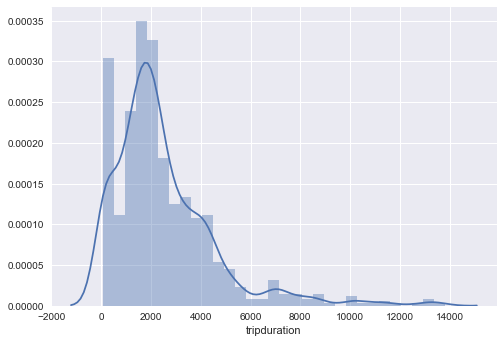

In [27]:
sns.distplot(bike_data[bike_data.route_id == '2006_2006'].tripduration)

In [54]:
top_routes = bike_data.where(bike_data['start station id'] != bike_data['end station id'])['route_id'].value_counts()[:20]

top_routes

432_3263     739
2006_3282    723
3254_3182    678
3182_3254    672
514_426      651
426_514      648
459_426      519
2006_3374    493
519_491      478
3256_426     464
3263_432     459
435_509      455
519_498      454
514_3256     452
426_2008     445
3093_460     416
3430_3086    414
3093_2002    411
3351_3318    407
3107_3090    405
Name: route_id, dtype: int64

In [55]:
top_routes.index

Index(['432_3263', '2006_3282', '3254_3182', '3182_3254', '514_426', '426_514',
       '459_426', '2006_3374', '519_491', '3256_426', '3263_432', '435_509',
       '519_498', '514_3256', '426_2008', '3093_460', '3430_3086', '3093_2002',
       '3351_3318', '3107_3090'],
      dtype='object')

In [56]:
points = []

for route in top_routes.index:
    point = [[bike_data.loc[bike_data.route_id == route]['start station latitude'].iloc[0], bike_data.loc[bike_data.route_id == route]['start station longitude'].iloc[0]],
             [bike_data.loc[bike_data.route_id == route]['end station latitude'].iloc[0], bike_data.loc[bike_data.route_id == route]['end station longitude'].iloc[0]]   
            ]
    points.append(point)

print(points)

[[[40.72621788, -73.983798550000003], [40.729236499100061, -73.990868031978607]], [[40.765909360000002, -73.976341509999997], [40.783070000000002, -73.959389999999999]], [[40.69231660719192, -74.014865756034837], [40.686931000000001, -74.016965999999996]], [[40.686931000000001, -74.016965999999996], [40.69231660719192, -74.014865756034837]], [[40.76087502, -74.002776679999997], [40.71754834, -74.013220689999997]], [[40.71754834, -74.013220689999997], [40.76087502, -74.002776679999997]], [[40.746745000000004, -74.007756000000001], [40.71754834, -74.013220689999997]], [[40.765909360000002, -73.976341509999997], [40.799484, -73.955613]], [[40.751872999999996, -73.977706000000012], [40.740963739999998, -73.986022129999995]], [[40.727714077777797, -74.011295735836029], [40.71754834, -74.013220689999997]], [[40.729236499100061, -73.990868031978607], [40.72621788, -73.983798550000003]], [[40.741739690000003, -73.994155559999996], [40.745497299999997, -74.001971389999994]], [[40.75187299999999

In [78]:
ave_lat = sum(p[0][0] for p in points)/len(points)
ave_lon = sum(p[0][1] for p in points)/len(points)

my_map = folium.Map(location=[ave_lat, ave_lon], tiles='Cartodb Positron', zoom_start=12)

for each in points:
    folium.Marker(each[0]).add_to(my_map)
    folium.Marker(each[1]).add_to(my_map)
    folium.PolyLine(each, color='red', weight=2.0, opacity=1).add_to(my_map)
    
# folium.PolyLine(points, color='red', weight=2.5, opacity=1).add_to(my_map)

my_map

In [77]:
points[0]

[[40.72621788, -73.983798550000003], [40.729236499100061, -73.990868031978607]]

In [79]:
start_rides = []

for route in top_routes.index:
    point = [bike_data.loc[bike_data.route_id == route]['start station latitude'].iloc[0], bike_data.loc[bike_data.route_id == route]['start station longitude'].iloc[0]]
    start_rides.append(point)

print(start_rides)

[[40.72621788, -73.983798550000003], [40.765909360000002, -73.976341509999997], [40.69231660719192, -74.014865756034837], [40.686931000000001, -74.016965999999996], [40.76087502, -74.002776679999997], [40.71754834, -74.013220689999997], [40.746745000000004, -74.007756000000001], [40.765909360000002, -73.976341509999997], [40.751872999999996, -73.977706000000012], [40.727714077777797, -74.011295735836029], [40.729236499100061, -73.990868031978607], [40.741739690000003, -73.994155559999996], [40.751872999999996, -73.977706000000012], [40.76087502, -74.002776679999997], [40.71754834, -74.013220689999997], [40.717451689999997, -73.958509390000003], [40.719078911795641, -73.94223690032959], [40.717451689999997, -73.958509390000003], [40.7869946, -73.941648020000002], [40.723116509999997, -73.952123240000006]]


In [84]:
import folium.plugins as plugins

m = folium.Map(location=[ave_lat, ave_lon], zoom_start=12)

hm = plugins.HeatMap(
    start_rides,
#     index=time_index,
#     auto_play=True,
#     max_opacity=0.3
)

hm.add_to(m)

m

In [87]:
bike_data.head()

tripduration            starttime             stoptime  start station id  \
0          1397  2017-06-01 00:00:02  2017-06-01 00:23:19               515   
1          1103  2017-06-01 00:00:13  2017-06-01 00:18:37               488   
2          1810  2017-06-01 00:00:20  2017-06-01 00:30:31               461   
3          1760  2017-06-01 00:00:24  2017-06-01 00:29:45              2009   
4          2165  2017-06-01 00:00:33  2017-06-01 00:36:38               360   

         start station name  start station latitude  start station longitude  \
0          W 43 St & 10 Ave               40.760094               -73.994618   
1           W 39 St & 9 Ave               40.756458               -73.993722   
2           E 20 St & 2 Ave               40.735877               -73.982050   
3  Catherine St & Monroe St               40.711174               -73.996826   
4      William St & Pine St               40.707179               -74.008873   

   end station id          end station name  end station latitude  \
0            3285  W 87 St  & Amsterdam Ave             40.788390   
1             297           E 15 St & 3 Ave             40.734232   
2             465        Broadway & W 41 St             40.755136   
3             527           E 33 St & 2 Ave             40.744023   
4             474           5 Ave & E 29 St             40.745168   

   end station longitude  bikeid    usertype  birth year  gender  route_id  
0             -73.974700   26642  Subscriber      1967.0       1  515_3285  
1             -73.986923   25656  Subscriber      1981.0       1   488_297  
2             -73.986580   21023  Subscriber      1982.0       1   461_465  
3             -73.976056   25718  Subscriber      1973.0       2  2009_527  
4             -73.986831   18691  Subscriber      1985.0       1   360_474

In [152]:
time_index = bike_data[:100].starttime


points = []
for t in range(len(time_index)):
    point = [[bike_data.iloc[t]['start station latitude'], bike_data.iloc[t]['start station longitude']]]
    points.append(point)
    


In [154]:
m = folium.Map(location=[ave_lat, ave_lon], zoom_start=12)

hm = plugins.HeatMapWithTime(points,
#     index=time_index,
    auto_play=True,
    max_opacity=0.3
)

hm.add_to(m)

m

In [138]:
from datetime import datetime, timedelta

np.random.seed(3141592)
initial_data = (
    np.random.normal(size=(100, 2)) * np.array([[.01, .01]]) +
    np.array([[ave_lat, ave_lon]])
)

move_data = np.random.normal(size=(100, 2)) * 0.00001
data = [(initial_data + move_data * i).tolist() for i in range(100)]

time_index = [
    (datetime.now() + k * timedelta(1)).strftime('%Y-%m-%d') for
    k in range(len(data))
]

m = folium.Map([ave_lat, ave_lon], tiles='Cartodb Positron', zoom_start=13)
hm = plugins.HeatMapWithTime(
    data,
    index=time_index,
    auto_play=True,
    max_opacity=0.3
)

hm.add_to(m)

m

In [139]:
len(data)

100

In [140]:
len(points)

100

In [141]:
points[:5]

[[40.760094369999997, -73.994618430000003],
 [40.756458240000001, -73.993722219999995],
 [40.735876779999998, -73.982050270000002],
 [40.711174440000001, -73.996826189999993],
 [40.707179359999998, -74.008873080000001]]

In [144]:
m = folium.Map([ave_lat, ave_lon], tiles='Cartodb Positron', zoom_start=13)
hm = plugins.HeatMapWithTime(
    data,
#     index=time_index,
    auto_play=True,
    max_opacity=0.3
)

hm.add_to(m)

m

In [181]:
time_index = bike_data[:1000].starttime

points = []
for t in range(len(time_index)):
    point = [[bike_data.iloc[t]['start station latitude'], bike_data.iloc[t]['start station longitude']]]
    points.append(point)
   
from itertools import chain

m = folium.Map([ave_lat, ave_lon], tiles='Cartodb Positron', zoom_start=12)
hm = plugins.HeatMap(list(chain(*points)), radius=10)
hm.add_to(m)

m